In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import seaborn as sns
sns.set_theme()

lab1 = pd.read_csv('./data/CP/labtest1_final.csv')
lab1.rename(columns={'Total':'lab1_marks'}, inplace=True)
#drop column from lab1
lab1 = lab1[['ID', 'Name', 'lab1_marks']]

lab2 = pd.read_csv('./data/CP/cp_labtest_2.csv')
lab2.rename(columns={'Total(75M)':'lab2_marks'}, inplace=True)
# take only specific columns
lab2 = lab2[['ID', 'Name', 'lab2_marks']]


midsem = pd.read_csv('./data/CP/cp_midsem_precheck.csv')
midsem.rename(columns={'Marks':'midsem_marks'}, inplace=True)
midsem['midsem_marks'] = midsem['midsem_marks'].fillna(0)

compre = pd.read_csv('./data/CP/cp_compre.csv')
compre.rename(columns={'Total(72M)':'compre_marks'}, inplace=True)
compre['compre_marks'] = compre['compre_marks'].fillna(0)
compre = compre[['ID', 'Name', 'compre_marks']]

In [65]:
midsem

,ID,Name,midsem_marks
0,2022A1PS0530P,IRA DOGRA,11.0
1,2022A1PS0589P,ASLESH JAMBHALE,18.0
2,2022A1PS0593P,AAYUSH AASHISH MAHESHWARI,16.0
3,2022A1PS0643P,SHIVANG GUPTA,30.0
4,2022A1PS0661P,ARYAMAN DUBEY,0.0
...,...,...,...
592,2022AAPS0363P,NISHKARSH JAIN,41.0
593,2022AAPS0366P,DIWAKAR MITTAL,30.0
594,2022AAPS0369P,SUBRAT ROY,24.0
595,2022AAPS1191P,SHAILENDRA KUMAR GUPTA,10.0


In [69]:
import functools as ft
dfs = [lab1, lab2, midsem, compre]
df = ft.reduce(lambda left, right: pd.merge(left, right, on='ID'), dfs)

/var/folders/vq/pg1xtx713y9dshb3yysyyh3r0000gn/T/ipykernel_1683/1218365398.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Name_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = ft.reduce(lambda left, right: pd.merge(left, right, on='ID'), dfs)


In [70]:
df = df[['ID', 'Name_x', 'lab1_marks', 'lab2_marks', 'midsem_marks', 'compre_marks']]
df.rename(columns={'Name_x':'Name'}, inplace=True)
df['code'] = df['ID'].str[4:6]

df['Marks'] = df['lab1_marks'] + df['lab2_marks'] + df['midsem_marks'] + df['compre_marks']
df

,ID,Name,Name,lab1_marks,lab2_marks,midsem_marks,compre_marks,code,Marks
0,2022A1PS0530P,IRA DOGRA,IRA DOGRA,15,37,11.0,20.0,A1,83.0
1,2022A1PS0589P,ASLESH JAMBHALE,ASLESH JAMBHALE,57,75,18.0,56.0,A1,206.0
2,2022A1PS0593P,AAYUSH AASHISH MAHESHWARI,AAYUSH AASHISH MAHESHWARI,21,58,16.0,33.0,A1,128.0
3,2022A1PS0643P,SHIVANG GUPTA,SHIVANG GUPTA,75,56,30.0,52.0,A1,213.0
4,2022A1PS0661P,ARYAMAN DUBEY,ARYAMAN DUBEY,4,31,0.0,20.0,A1,55.0
...,...,...,...,...,...,...,...,...,...
577,2022AAPS0360P,SPARSH JHANWAR,SPARSH JHANWAR,15,17,17.0,47.0,AA,96.0
578,2022AAPS0363P,NISHKARSH JAIN,NISHKARSH JAIN,73,75,41.0,49.0,AA,238.0
579,2022AAPS0366P,DIWAKAR MITTAL,DIWAKAR MITTAL,65,38,30.0,38.0,AA,171.0
580,2022AAPS0369P,SUBRAT ROY,SUBRAT ROY,24,51,24.0,42.0,AA,141.0


In [52]:
max_marks = 272

Text(0.5, 1.0, 'Marks Distribution for CP')

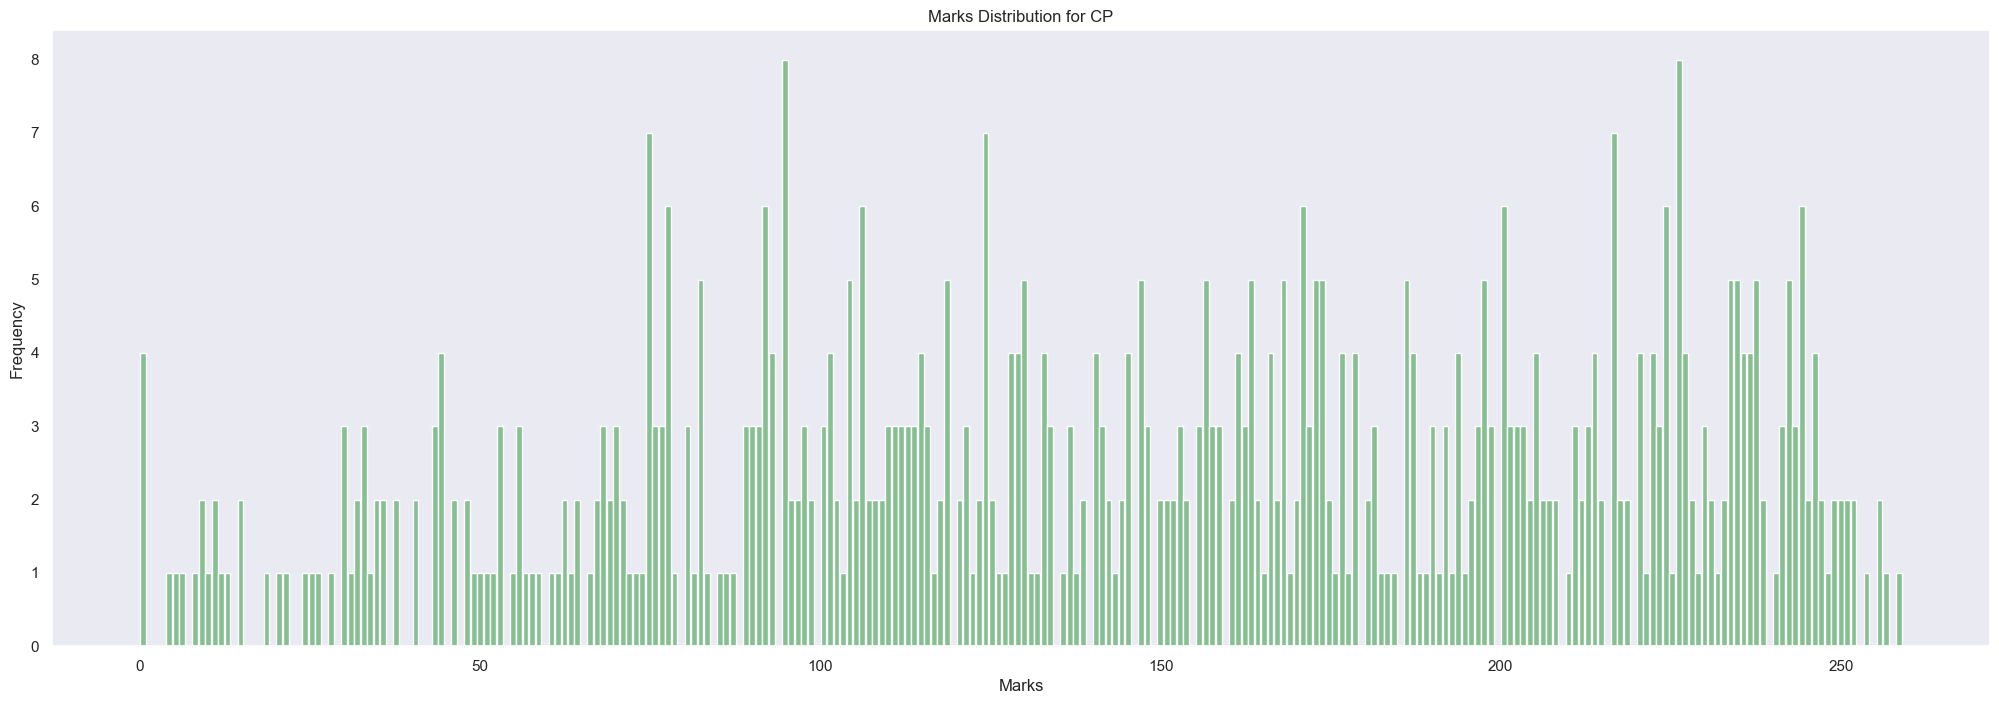

In [56]:
df.hist(column='Marks',bins=max_marks, grid=False, figsize=(25,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Marks Distribution for CP')

In [57]:
print(f"Mean: {df['Marks'].mean()}")
print(f"Median: {df['Marks'].median()}")

Mean: 146.16752577319588
Median: 150.0


In [58]:
for i in range(250, 300):
    print(f"marks: {i} -> {stats.percentileofscore(df['Marks'], i, kind='weak')}")

marks: 250 -> 98.45360824742268
marks: 251 -> 98.79725085910653
marks: 252 -> 99.14089347079037
marks: 253 -> 99.14089347079037
marks: 254 -> 99.3127147766323
marks: 255 -> 99.3127147766323
marks: 256 -> 99.65635738831615
marks: 257 -> 99.82817869415807
marks: 258 -> 99.82817869415807
marks: 259 -> 100.0
marks: 260 -> 100.0
marks: 261 -> 100.0
marks: 262 -> 100.0
marks: 263 -> 100.0
marks: 264 -> 100.0
marks: 265 -> 100.0
marks: 266 -> 100.0
marks: 267 -> 100.0
marks: 268 -> 100.0
marks: 269 -> 100.0
marks: 270 -> 100.0
marks: 271 -> 100.0
marks: 272 -> 100.0
marks: 273 -> 100.0
marks: 274 -> 100.0
marks: 275 -> 100.0
marks: 276 -> 100.0
marks: 277 -> 100.0
marks: 278 -> 100.0
marks: 279 -> 100.0
marks: 280 -> 100.0
marks: 281 -> 100.0
marks: 282 -> 100.0
marks: 283 -> 100.0
marks: 284 -> 100.0
marks: 285 -> 100.0
marks: 286 -> 100.0
marks: 287 -> 100.0
marks: 288 -> 100.0
marks: 289 -> 100.0
marks: 290 -> 100.0
marks: 291 -> 100.0
marks: 292 -> 100.0
marks: 293 -> 100.0
marks: 294 -> 

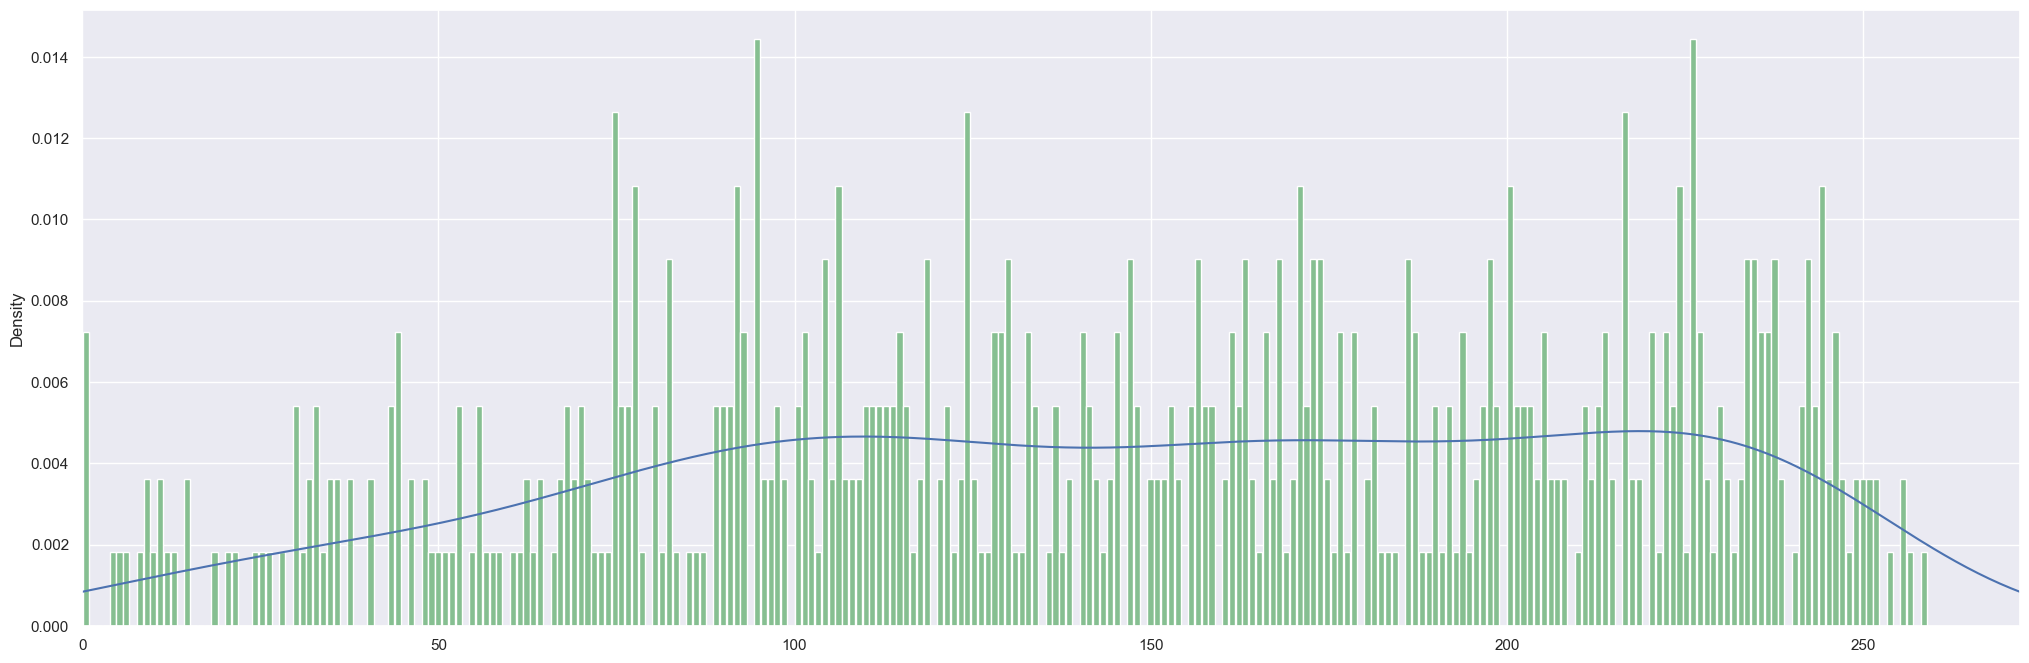

In [60]:
fig, ax = plt.subplots(figsize = (6,4))
df['Marks'].plot(kind = "hist", density=True, bins=max_marks, grid=False, figsize=(25,8), color='#86bf91', zorder=2, rwidth=0.9)
df['Marks'].plot(kind = "kde", ax=ax)
ax.set_xlim(0, max_marks)
plt.show()

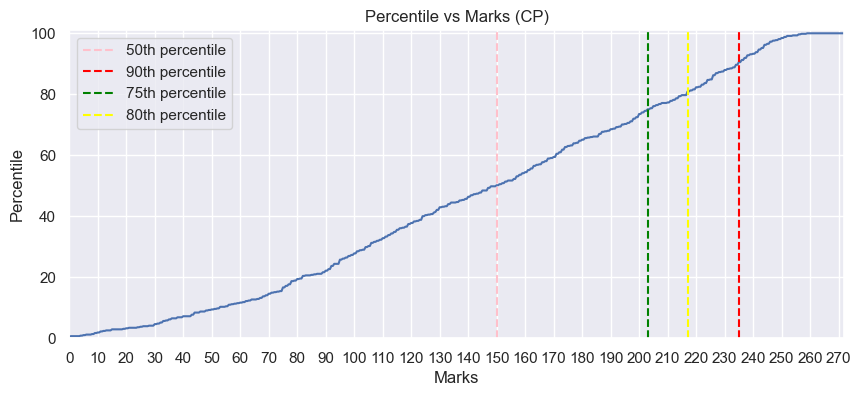

In [63]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,4))
fun = lambda k: [i/k for i in list(range(1, max_marks*k + 1))]

a = fun(2)
b = [stats.percentileofscore(df["Marks"],i, kind='weak') for i in a]
ax.plot(a, b)

lis = [i for i in range(0, 101)]

plt.axvline(x=df['Marks'].quantile([0.5]).values[0], color='pink', linestyle='--', label='50th percentile')
plt.axvline(x=df['Marks'].quantile([0.9]).values[0], color='red', linestyle='--', label='90th percentile')
plt.axvline(x=df['Marks'].quantile([0.75]).values[0], color='green', linestyle='--', label='75th percentile')
plt.axvline(x=df['Marks'].quantile([0.8]).values[0], color='yellow', linestyle='--', label='80th percentile')



ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_ylim(0,101)
ax.set_xlim(0,max_marks)
ax.set_xlabel("Marks")
ax.set_ylabel("Percentile")
ax.set_title("Percentile vs Marks (CP)")
ax.legend()
plt.show()

<AxesSubplot:>

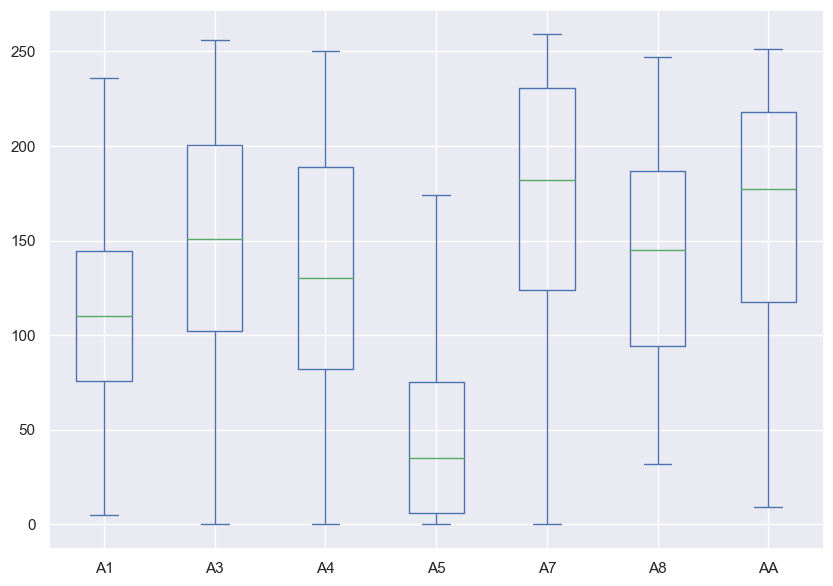

In [72]:
pivot = df.pivot_table(index="ID", columns='code', values='Marks')
pivot.plot(kind='box', figsize=(10, 7))

In [ ]:
a7_df = df[df['code'] == 'A7']
a7_df